# Download dataset from shared link

In [1]:
!gdown 1ITHMMBXnPR4hS4jfW07xBSSgSTNU1zrU # Download MAC_derand_lecture-dataset.zip dataset form goole drive
!gdown 18HlDcQVtwzDGfHz0aKUGwZsiwd61SC8A # Download MAC_derand_challenge-dataset.zip dataset form goole drive

Downloading...
From: https://drive.google.com/uc?id=1ITHMMBXnPR4hS4jfW07xBSSgSTNU1zrU
To: /content/MAC_derand_lecture-dataset.zip
100% 53.1k/53.1k [00:00<00:00, 20.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=18HlDcQVtwzDGfHz0aKUGwZsiwd61SC8A
To: /content/MAC_derand_challenge-dataset.zip
100% 82.6k/82.6k [00:00<00:00, 50.1MB/s]


# Unzip dataset

In [2]:
! unzip -qq '/content/MAC_derand_lecture-dataset.zip'
! unzip -qq '/content/MAC_derand_challenge-dataset.zip'

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import itertools
from sklearn.metrics import homogeneity_completeness_v_measure
import random
from sklearn.preprocessing import LabelEncoder
import math


# Read all csv files and combine them into one

In [4]:
base_dir = '/content/lecture-dataset/'

df_list = list()

for root, dirs, files in os.walk(base_dir):
  for file in files:
    if file.endswith(".csv"):
      file_path = os.path.join(root,file)

      df = pd.read_csv(file_path) # read csv file and
      df_list.append(df) # add it to df_list
original_dataset = pd.concat(df_list, ignore_index=True) # combine all csv files together

original_dataset['Timestamp']=pd.to_datetime(original_dataset['Timestamp'], unit='s') # turn timestamp to a readable one

display(original_dataset)



,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2023-10-12 13:13:58.530533120,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
1,2023-10-12 13:13:58.576313088,06:ac:28:5b:d9:63,1,1.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
2,2023-10-12 13:13:58.486882048,f7:95:30:e5:7c:3e,11,11.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
3,2023-10-12 13:13:58.550159872,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
4,2023-10-12 13:13:58.618285824,c6:30:ee:18:34:a8,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2023-05-20 13:48:50.284313088,c2:36:7b:35:f4:a5,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4984,2023-05-20 13:48:50.494008064,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4985,2023-05-20 13:48:50.514439936,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4986,2023-05-20 13:49:40.855052032,f6:e8:46:ec:d1:90,6,6.0,2d001bffff000000000000000000000000000000000000...,8.000000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000f5fff5ff39...,132,S21Ultra-M_a


# EDA part

## dataset info

In [5]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 4988 non-null   datetime64[ns]
 1   MAC Address               4988 non-null   object        
 2   Channel                   4988 non-null   int64         
 3   DS Channel                4959 non-null   float64       
 4   HT Capabilities           4987 non-null   object        
 5   Extended Capabilities     4987 non-null   float64       
 6   Vendor Specific Tags      4045 non-null   object        
 7   SSID                      427 non-null    object        
 8   Supported Rates           4988 non-null   object        
 9   Extended Supported Rates  4987 non-null   object        
 10  VHT Capabilities          0 non-null      float64       
 11  HE Capabilities           933 non-null    object        
 12  Length              

## Remove columns with nan values more than 60 % of total

In [6]:
nan_sum = original_dataset.isna().sum()
print('The following part dentoes the number of nan values in each column')
print('='*80)
print(nan_sum)

The following part dentoes the number of nan values in each column
Timestamp                      0
MAC Address                    0
Channel                        0
DS Channel                    29
HT Capabilities                1
Extended Capabilities          1
Vendor Specific Tags         943
SSID                        4561
Supported Rates                0
Extended Supported Rates       1
VHT Capabilities            4988
HE Capabilities             4055
Length                         0
Label                          0
dtype: int64


In [7]:
# Calculate how much percent for ecach
nan_percentage = (nan_sum/len(original_dataset))*100
print('The following part is showing the percentage of nan values in each column')
print('='*80)
print(nan_percentage)

The following part is showing the percentage of nan values in each column
Timestamp                     0.000000
MAC Address                   0.000000
Channel                       0.000000
DS Channel                    0.581395
HT Capabilities               0.020048
Extended Capabilities         0.020048
Vendor Specific Tags         18.905373
SSID                         91.439455
Supported Rates               0.000000
Extended Supported Rates      0.020048
VHT Capabilities            100.000000
HE Capabilities              81.295108
Length                        0.000000
Label                         0.000000
dtype: float64


In [8]:
# remove them
col_drop = []

for i in range(0,len(nan_percentage)):
  if nan_percentage[i] > 60:
    col_drop.append(nan_percentage.index[i])
print('The following columns has been deleted from dataset since they had more than 60% nan values inside themselves')
print('='*110)
print('\t\t\t',col_drop)
print('\nNow dataset is like this:')

clean_original_dataset = original_dataset.drop(col_drop, axis=1)
display(clean_original_dataset)

The following columns has been deleted from dataset since they had more than 60% nan values inside themselves
			 ['SSID', 'VHT Capabilities', 'HE Capabilities']

Now dataset is like this:


,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2023-10-12 13:13:58.530533120,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
1,2023-10-12 13:13:58.576313088,06:ac:28:5b:d9:63,1,1.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
2,2023-10-12 13:13:58.486882048,f7:95:30:e5:7c:3e,11,11.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
3,2023-10-12 13:13:58.550159872,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
4,2023-10-12 13:13:58.618285824,c6:30:ee:18:34:a8,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...,...
4983,2023-05-20 13:48:50.284313088,c2:36:7b:35:f4:a5,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
4984,2023-05-20 13:48:50.494008064,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
4985,2023-05-20 13:48:50.514439936,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
4986,2023-05-20 13:49:40.855052032,f6:e8:46:ec:d1:90,6,6.0,2d001bffff000000000000000000000000000000000000...,8.000000e+10,NaN,82848b96,0c1218243048606c,132,S21Ultra-M_a


## Remove timestamp

In [9]:
clean_original_dataset.drop(['Timestamp'],axis=1,inplace=True)

## Choose columns with maximum 20 unique values and call them features

In [10]:
unique_elem = clean_original_dataset.nunique()

print(unique_elem)

features = []

for i in range(0,len(unique_elem)-1):
  if unique_elem[i] < 20:
    features.append(unique_elem.index[i])
print('='*80)
print('We have selected the folliwing columns as our features:\n')
print('\t\t\t\t||')
print('\t\t\t\t||')
print('\t\t\t\t')
for feature in features:
  print(feature)


MAC Address                 718
Channel                       3
DS Channel                   13
HT Capabilities               8
Extended Capabilities         7
Vendor Specific Tags          5
Supported Rates               4
Extended Supported Rates      2
Length                       16
Label                         7
dtype: int64
We have selected the folliwing columns as our features:

				||
				||
				
Channel
DS Channel
HT Capabilities
Extended Capabilities
Vendor Specific Tags
Supported Rates
Extended Supported Rates
Length


## Label Encoding

In [11]:

# label encoding on some columns except 'Length, Channel, DS Channel'
def encoder(df,features):
  df_tmp = df.copy()
  for elem in features:
    if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel':
      label_encoder = LabelEncoder()
      df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))

  # encode Label for correlation matrxi

  df_tmp[features]=df_tmp[features].astype(float)
  return df_tmp

encoded_dataset = encoder(clean_original_dataset,features)
display(encoded_dataset)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,08:8c:3f:25:64:de,6.0,6.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
1,06:ac:28:5b:d9:63,1.0,1.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
2,f7:95:30:e5:7c:3e,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
3,08:8c:3f:25:64:de,6.0,6.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
4,c6:30:ee:18:34:a8,6.0,5.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...
4983,c2:36:7b:35:f4:a5,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4984,c2:36:7b:35:f4:a5,11.0,11.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4985,c2:36:7b:35:f4:a5,11.0,11.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4986,f6:e8:46:ec:d1:90,6.0,6.0,4.0,3.0,5.0,1.0,0.0,5.0,S21Ultra-M_a


# Groupby Mac Address

In [12]:
# see unique mac addresses
unique_mac_addresses = len(np.unique(encoded_dataset['MAC Address']))
print(f'We have: {unique_mac_addresses} unique Mac addresses')
print('='*80)
grouped_dataset = encoded_dataset.groupby(['MAC Address']) # Group by Mac Address
grouped_dataset = grouped_dataset.first().reset_index() # Show first row of groupd mac address
display(grouped_dataset)

We have: 718 unique Mac addresses


,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,00:0f:00:6a:68:8b,1.0,NaN,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K
1,00:78:b5:8a:40:84,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
2,00:c6:7e:33:8c:62,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
3,00:cb:d6:50:04:2c,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
4,01:31:03:f5:11:4b,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...
713,fe:7b:b8:60:08:c7,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
714,fe:9d:55:a5:9f:4a,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W
715,fe:d8:06:8a:6a:09,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,iPhoneXR-U
716,fe:f9:fc:fb:83:9e,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


# Feature Selection

## Correlation matrix

In [13]:
# We need to fill nan values in features and then encode Label column to use correlation matrix
nan_sum = grouped_dataset.isna().sum()
print('The following part dentoes the number of nan values in each column')
print('='*80)
print(nan_sum)

The following part dentoes the number of nan values in each column
MAC Address                 0
Channel                     0
DS Channel                  1
HT Capabilities             0
Extended Capabilities       0
Vendor Specific Tags        0
Supported Rates             0
Extended Supported Rates    0
Length                      0
Label                       0
dtype: int64


In [14]:
# Just onlu one nan in the DS Channel must be filled
grouped_dataset['DS Channel'].fillna(value=1.0, inplace=True) # fill with value=1, since it is the most common DS Cahnnel found

In [15]:
display(grouped_dataset)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,00:0f:00:6a:68:8b,1.0,1.0,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K
1,00:78:b5:8a:40:84,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
2,00:c6:7e:33:8c:62,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
3,00:cb:d6:50:04:2c,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
4,01:31:03:f5:11:4b,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...
713,fe:7b:b8:60:08:c7,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
714,fe:9d:55:a5:9f:4a,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W
715,fe:d8:06:8a:6a:09,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,iPhoneXR-U
716,fe:f9:fc:fb:83:9e,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


In [16]:
correlation_dataset = grouped_dataset[features].copy()
correlation_dataset['Label'] = grouped_dataset['Label']
label_encoder = LabelEncoder() # Let's encode Mac and Label columns to see correlation matrix
correlation_dataset['Label'] = label_encoder.fit_transform(correlation_dataset['Label'].astype(str))
display(correlation_dataset)

,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,1.0,1.0,8.0,7.0,5.0,3.0,2.0,15.0,2
1,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,3
2,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,3
3,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,3
4,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,3
...,...,...,...,...,...,...,...,...,...
713,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,3
714,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,4
715,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,6
716,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,5


Channel                     0.242620
DS Channel                  0.278936
HT Capabilities             0.486363
Extended Capabilities      -0.363437
Vendor Specific Tags        0.176417
Supported Rates             0.148748
Extended Supported Rates   -0.025376
Length                     -0.433794
Label                       1.000000
Name: Label, dtype: float64
Recommended features to use :
['HT Capabilities','Lenght','Extended Capabilities','DS Channel', 'Channel']


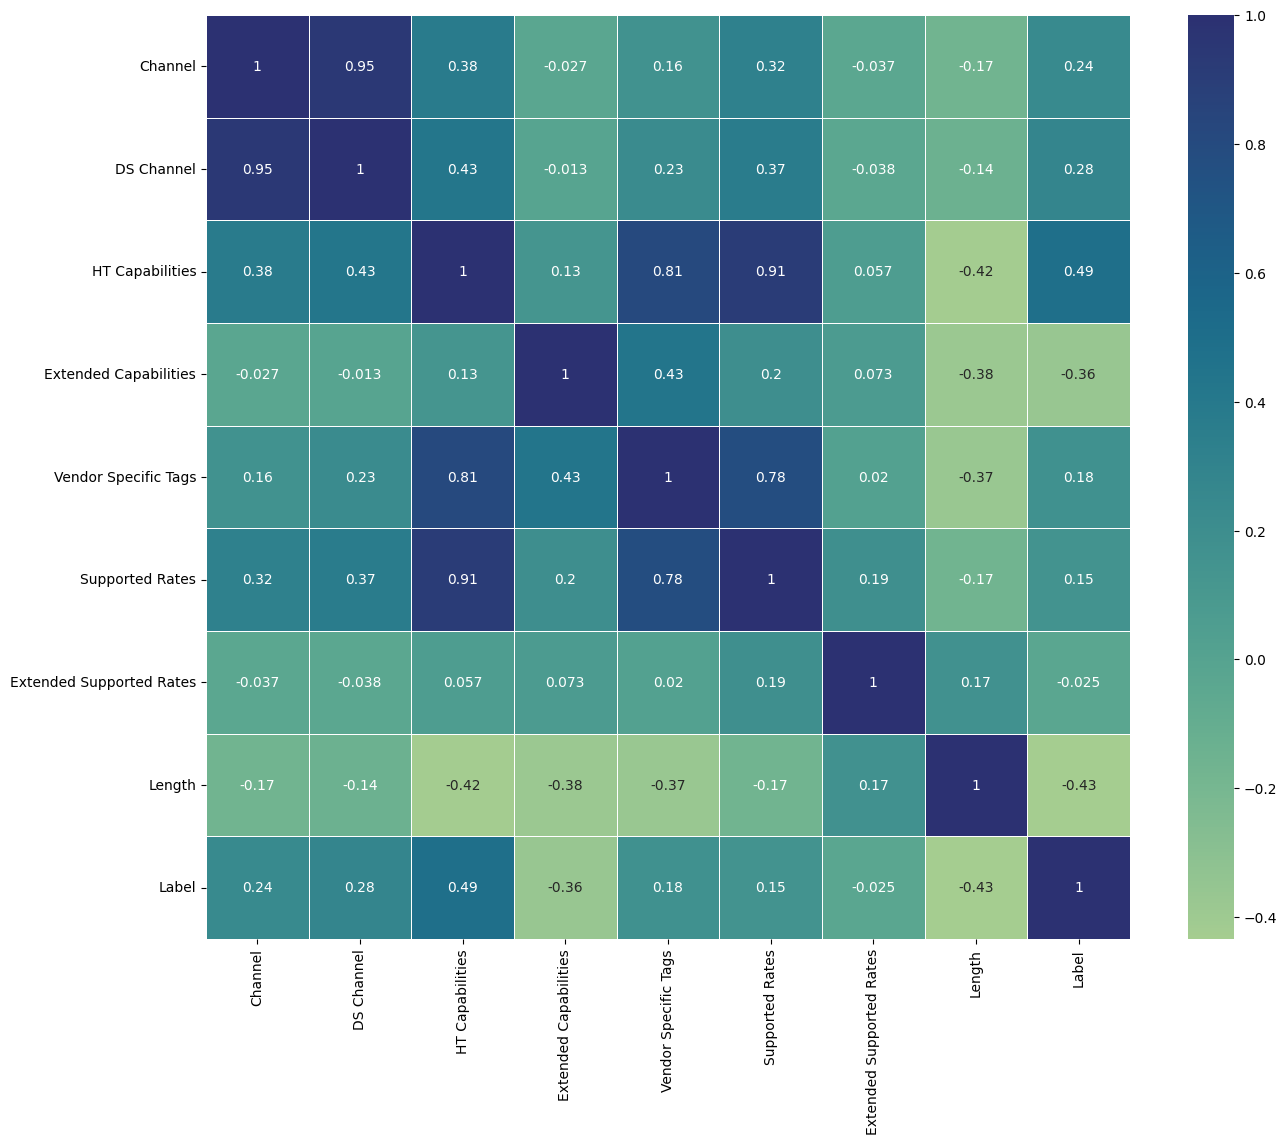

In [17]:
# We need to know the effect of fetures on each other and on traget
f, ax = plt.subplots(figsize=(15, 12))
corr = correlation_dataset.corr()
sns.heatmap((corr ),annot=True,linewidth=.5,
            cmap='crest',
            square=True, ax=ax)#, vmin=0, vmax=100)

print(corr['Label'])
print('='*80)
print('Recommended features to use :')
print("['HT Capabilities','Lenght','Extended Capabilities','DS Channel', 'Channel']")
print('='*80)

## Mutual Info/Gain Entropy

In [18]:
x_train =grouped_dataset[features].copy()
y_train =grouped_dataset['Label'].copy()
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
display(mutual_info)
print('='*80)
print('Recommended features to use :')
print("['Lenght','HT Capabilities','Extended Capabilities','Vendor Specific Tags', 'Supported Rates']")

Channel                     0.192456
DS Channel                  0.406348
HT Capabilities             1.106065
Extended Capabilities       1.017364
Vendor Specific Tags        0.941927
Supported Rates             0.600287
Extended Supported Rates    0.008844
Length                      1.527365
dtype: float64

Recommended features to use :
['Lenght','HT Capabilities','Extended Capabilities','Vendor Specific Tags', 'Supported Rates']


## Cross Tab

In [19]:
len(features)

8

In [20]:
def plot_heatmap(df, features, colormap="Blues"):


  sns.set_theme(style="whitegrid",font_scale=1)
  titles = features
  fig, axs = plt.subplots(4, 2, figsize=(20, 32))

  #sns.heatmap(crosstab,annot=True, fmt="d", cmap=colormap)
  # Plot data and set titles using a loop
  for i, ax in enumerate(axs.flat):
    crosstab = pd.crosstab(df['Label'], df[features[i]])
    sns.heatmap(crosstab,annot=True, ax=ax,fmt="d", cmap=colormap)
    ax.set_title(titles[i])
    ax.set_xlabel(titles[i])
    ax.set_ylabel('Label')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()





<Figure size 640x480 with 0 Axes>

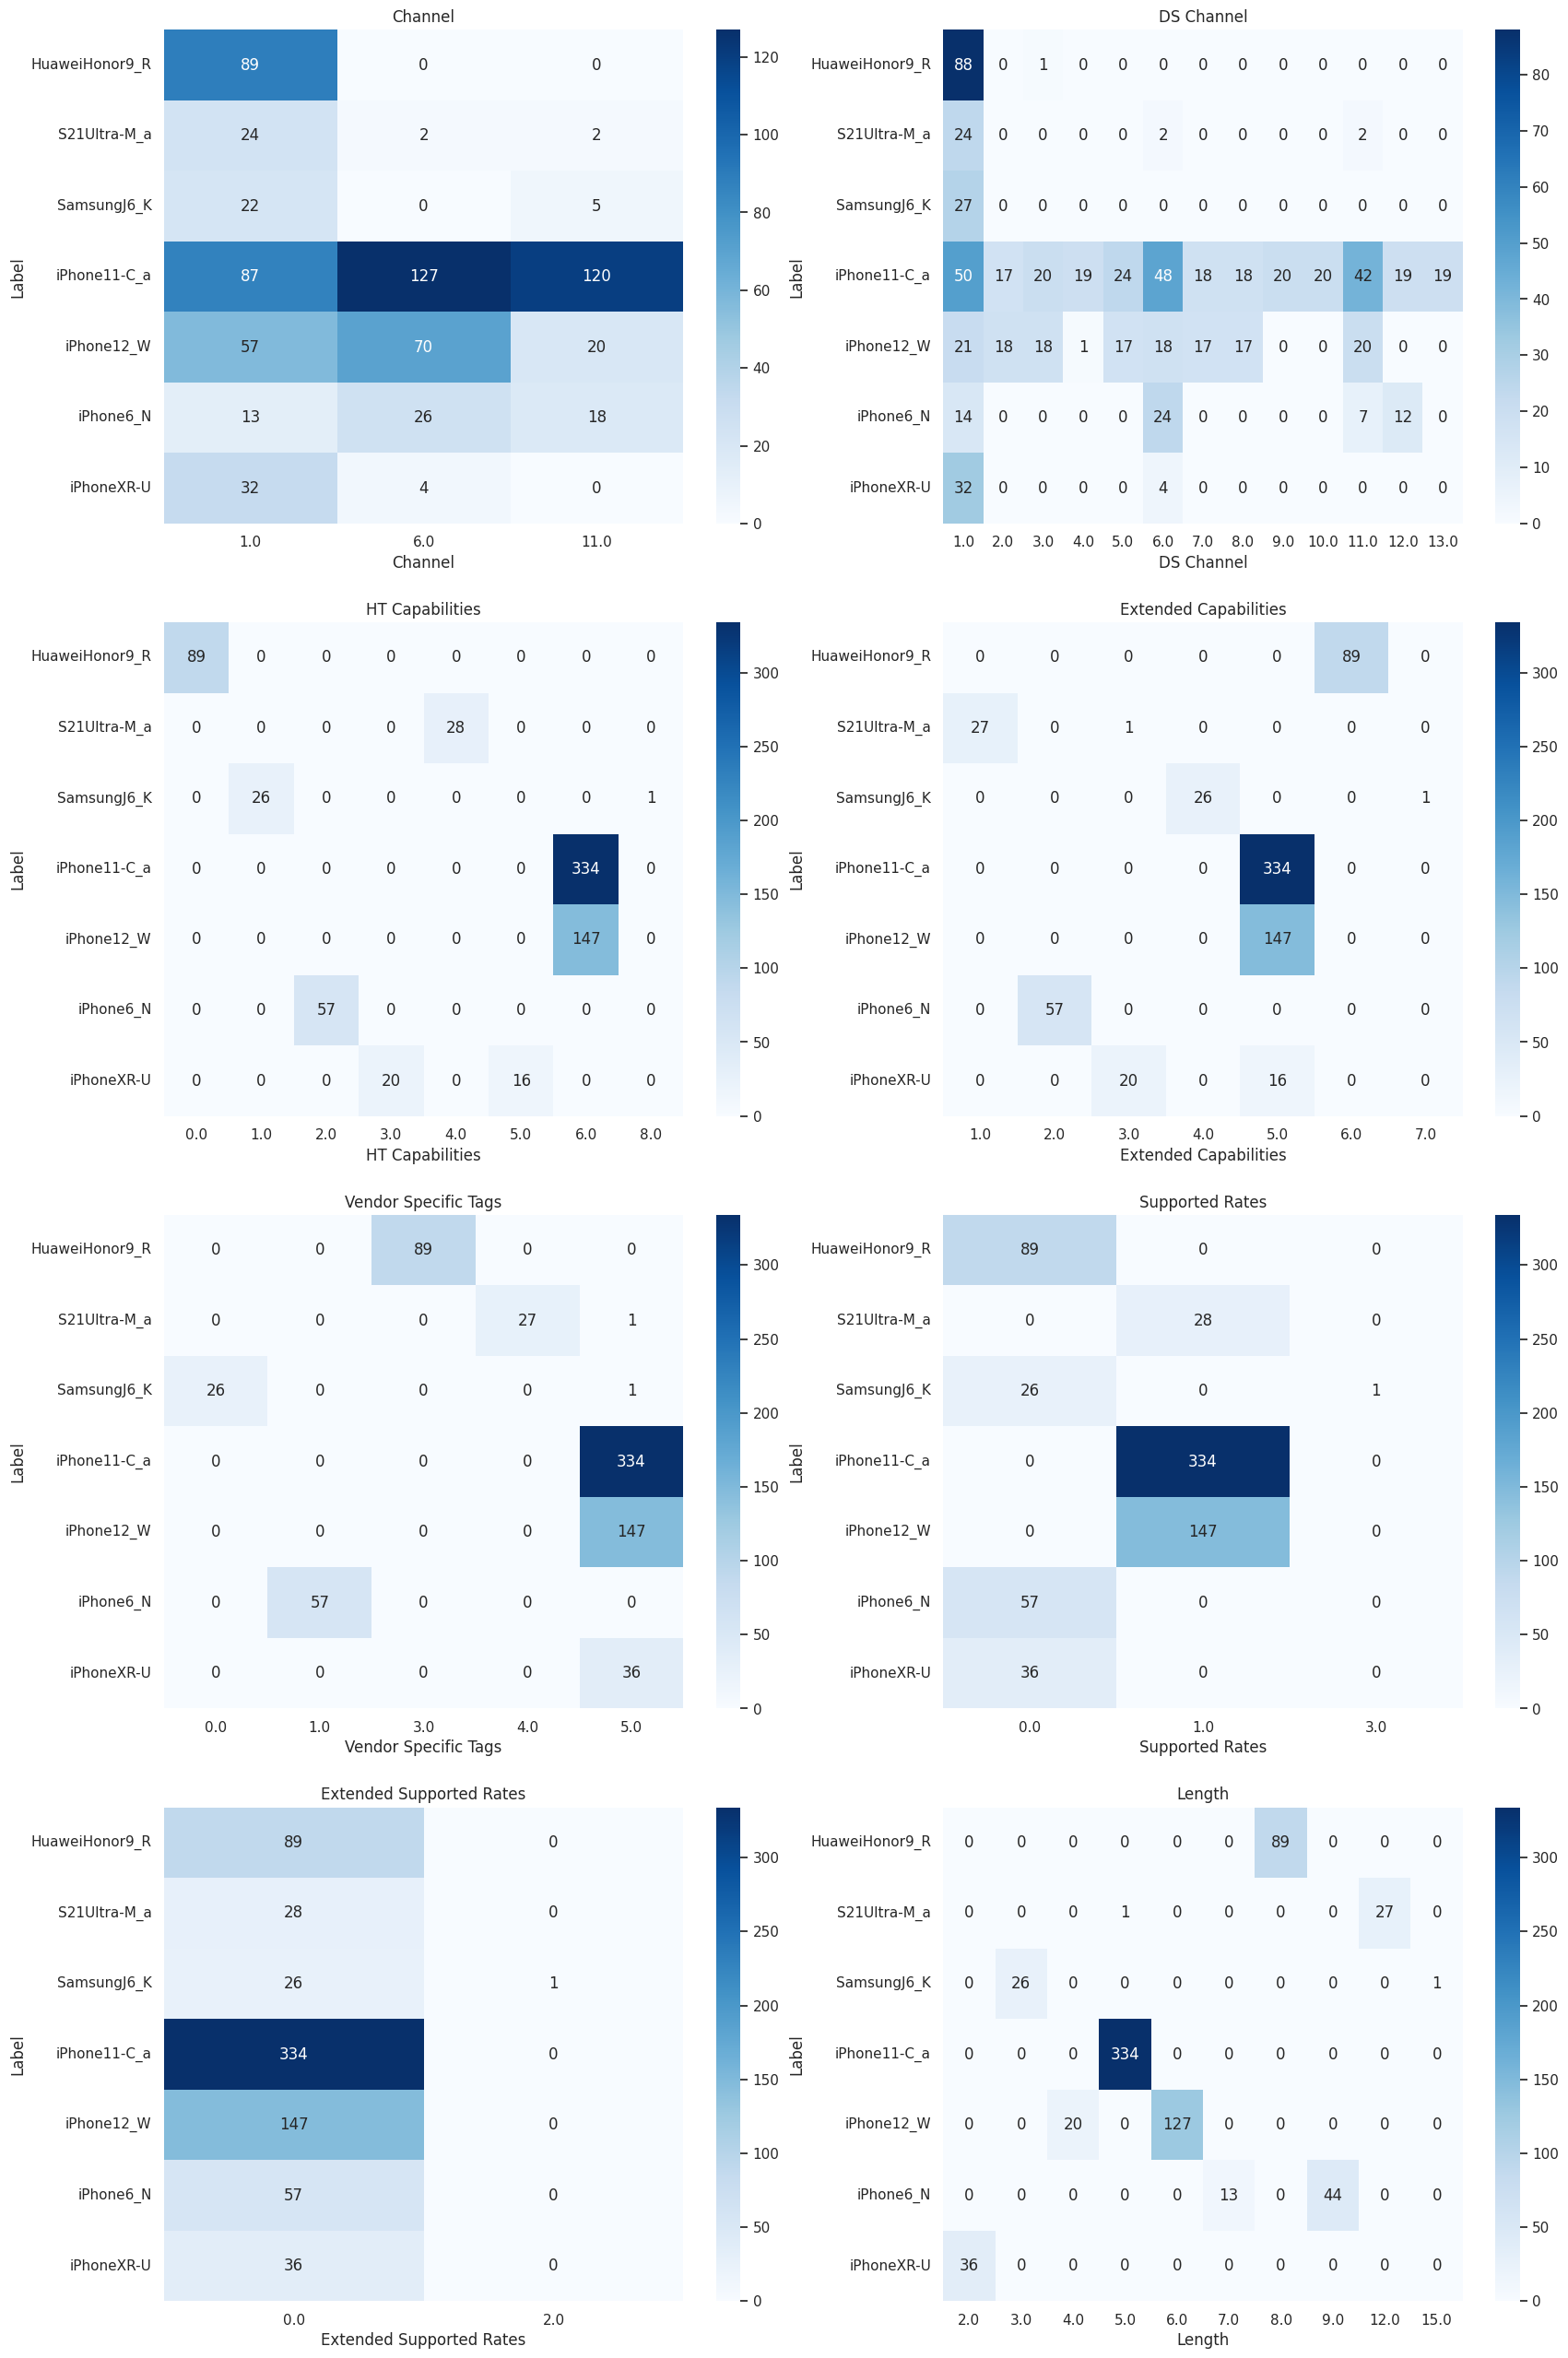

In [21]:
# In the following codes, you see the correlations of columns with each other
plot_heatmap(grouped_dataset,features)

## Broute Force combinations

In [ ]:
all_feature_combinations = []

for r in range(1, len(features)+1):
    all_feature_combinations.extend(itertools.combinations(features, r))


# Create a table to store all feature combinations performance on our datasets
first_performance_table = pd.DataFrame({},index=['Homogeneous','completeness','V_measure','No_of_Clusters','No_Labels','Error'])


# See and save performance of all feature combinations on first performance table
brute_force_df = grouped_dataset.copy()
for index,item in enumerate(all_feature_combinations):
  selected_features = list(item)
  brute_force_df[f"Cluster_{index}"]=brute_force_df.groupby(selected_features).ngroup() # Group by seleceted features and give them a number
  result = homogeneity_completeness_v_measure(brute_force_df["Label"],brute_force_df[f"Cluster_{index}"])
  No_of_Clusters = len(np.unique(brute_force_df[f"Cluster_{index}"]))
  No_Labels = len(np.unique(brute_force_df["Label"]))
  Error = No_of_Clusters-No_Labels
  result = list(result)
  result.append(No_of_Clusters)
  result.append(No_Labels)
  result.append(Error)


  result = np.reshape(result,(6,1))
  first_performance_table[f'Cluster_{index}'] = result



In [30]:
display(first_performance_table)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_245,Cluster_246,Cluster_247,Cluster_248,Cluster_249,Cluster_250,Cluster_251,Cluster_252,Cluster_253,Cluster_254
Homogeneous,0.138779,0.279538,0.732336,0.664772,0.601125,0.393349,0.002982,0.993841,0.294904,0.744822,...,1.000000,0.772558,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
completeness,0.201420,0.199372,0.965429,0.956649,0.987244,0.990266,0.435426,0.918410,0.205508,0.565175,...,0.900375,0.398899,0.462071,0.462071,0.462071,0.462071,0.462071,0.635206,0.465102,0.462071
V_measure,0.164332,0.232745,0.832881,0.784440,0.747253,0.563047,0.005924,0.954638,0.242221,0.642680,...,0.947576,0.526135,0.632078,0.632078,0.632078,0.632078,0.632078,0.776913,0.634907,0.632078
No_of_Clusters,3.000000,13.000000,8.000000,7.000000,5.000000,3.000000,2.000000,10.000000,16.000000,16.000000,...,12.000000,31.000000,40.000000,40.000000,40.000000,40.000000,40.000000,20.000000,38.000000,40.000000
No_Labels,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Error,-4.000000,6.000000,1.000000,0.000000,-2.000000,-4.000000,-5.000000,3.000000,9.000000,9.000000,...,5.000000,24.000000,33.000000,33.000000,33.000000,33.000000,33.000000,13.000000,31.000000,33.000000


In [144]:
best_Errors = first_performance_table.columns[(first_performance_table.loc['Error'] <2) & (first_performance_table.loc['Error'] >= 0)]

In [149]:
best_clusters = first_performance_table[best_Errors]
best_clusters

,Cluster_2,Cluster_3,Cluster_12,Cluster_23,Cluster_24,Cluster_26,Cluster_28,Cluster_30,Cluster_54,Cluster_79,Cluster_83,Cluster_88
Homogeneous,0.732336,0.664772,0.484023,0.732336,0.732336,0.664772,0.664772,0.725847,0.484023,0.732336,0.664772,0.725847
completeness,0.965429,0.956649,0.466338,0.965429,0.965429,0.956649,0.956649,0.989413,0.466338,0.965429,0.956649,0.989413
V_measure,0.832881,0.784440,0.475016,0.832881,0.832881,0.784440,0.784440,0.837381,0.475016,0.832881,0.784440,0.837381
No_of_Clusters,8.000000,7.000000,7.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000
No_Labels,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Error,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [157]:
selected_features_list = []
for column in best_clusters.columns:
  number = int(column.split('_')[1])
  selected_features_list.append(all_feature_combinations[number])

In [24]:



print('Features and combinations recommended to use:')
print('='*80)
print(all_feature_combinations[7],'--> cluster_7')
print(all_feature_combinations[32],'--> cluster_32')
print(all_feature_combinations[34],'--> cluster_34')
print(all_feature_combinations[35],'--> cluster_35')
print(all_feature_combinations[89],'--> cluster_89')
print('='*80)
print('Their performance:\n')
display(first_performance_table[top_5_indices[2]])



Features and combinations recommended to use:
('Length',) --> cluster_7
('Vendor Specific Tags', 'Length') --> cluster_32
('Supported Rates', 'Length') --> cluster_34
('Extended Supported Rates', 'Length') --> cluster_35
('Vendor Specific Tags', 'Supported Rates', 'Length') --> cluster_89
Their performance:



,Cluster_7,Cluster_32,Cluster_34,Cluster_35,Cluster_89
h,0.993841,0.993841,0.993841,0.993841,0.993841
c,0.918410,0.918410,0.918410,0.918410,0.918410
v,0.954638,0.954638,0.954638,0.954638,0.954638


# Train part
Based on different mothods used above, clustering data based on

**('Vendor Specific Tags', 'Supported Rates', 'Length')** features could be useful.




In [63]:
selected_features = list(('Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates'))

In [64]:
train_cluster_df = grouped_dataset.copy()
train_cluster_df['Cluster_ID'] =  train_cluster_df.groupby(selected_features).ngroup()
display(train_cluster_df)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster_ID
0,00:0f:00:6a:68:8b,1.0,1.0,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K,6
1,00:78:b5:8a:40:84,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,5
2,00:c6:7e:33:8c:62,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,5
3,00:cb:d6:50:04:2c,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,5
4,01:31:03:f5:11:4b,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,5
...,...,...,...,...,...,...,...,...,...,...,...
713,fe:7b:b8:60:08:c7,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,5
714,fe:9d:55:a5:9f:4a,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,5
715,fe:d8:06:8a:6a:09,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,iPhoneXR-U,4
716,fe:f9:fc:fb:83:9e,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N,1


## Performance On train_dataset

In [65]:
homogeneous, completeness, V_measure= homogeneity_completeness_v_measure(train_cluster_df["Label"],train_cluster_df[f"Cluster_ID"])
n_unique_clusterid = len(np.unique(train_cluster_df["Cluster_ID"]))
n_unique_label = len(np.unique(train_cluster_df["Label"]))
Error = n_unique_clusterid-n_unique_label
print('Perfomance on train_dataset:')
print('='*80)

train_performance_table = pd.DataFrame({'train_dataset':[homogeneous, completeness, V_measure,Error]},
                                       index=['Homogeneous','completeness','V_measure','Error'])

display(train_performance_table)


Perfomance on train_dataset:


,train_dataset
Homogeneous,0.725847
completeness,0.989413
V_measure,0.837381
Error,0.000000


# Validation part

## Prepare val_dataset using different K

In [66]:
def prepare_validation_datasets(k):
  no_val_dataset_list = [1,2,3,4,5,6]
  if k != 6:
    random_numbers = random.sample(no_val_dataset_list, k)

    print(random_numbers)
  elif k==6:
    random_numbers = random.sample(no_val_dataset_list, k)




In [67]:
def load_val_datasets(no_dataset_to_load):

  base_dir = '/content/challenge-dataset'

  df_list = list()


  for root, dirs, files in os.walk(base_dir):
    files = random.sample(files,no_dataset_to_load )
    #print(files)
    for file in enumerate(files):
      if file[1].endswith(".csv"):
        file_path = os.path.join(root,file[1])
        print(file_path)
        df = pd.read_csv(file_path)
        df_list.append(df)
        #value +=1


  raw_val_dataset = pd.concat(df_list, ignore_index=True)

  raw_val_dataset['Timestamp']=pd.to_datetime(raw_val_dataset['Timestamp'], unit='s')

  # display(raw_val_dataset)
  return raw_val_dataset



In [68]:
# Create a folder for val_datasets
os.mkdir(f"/content/validation_dataset")

In [69]:
def create_5_val_dataset(k,dataset):
  if k !=6:
    os.mkdir(f"/content/validation_dataset/K={k}")
    num_rows_per_test = len(dataset) // 5  # Divide the original dataset into 5 equal parts
    original_dataset = dataset.copy()
    # Shuffle the original dataset
    shuffled_dataset = dataset.sample(frac=1).reset_index(drop=True)

    # Create five test datasets
    val_datasets = []
    for i in range(5):
        start_idx = i * num_rows_per_test
        end_idx = (i + 1) * num_rows_per_test if i < 4 else None  # Handle the last part which might have fewer rows
        val_datasets.append(shuffled_dataset.iloc[start_idx:end_idx])

    # Optionally, you can save each test dataset to separate CSV files
    for i, val_data in enumerate(val_datasets):

        val_data.to_csv(f"/content/validation_dataset/K={k}/val_dataset_{i + 1}.csv", index=False)
    original_dataset.to_csv(f"/content/validation_dataset/K={k}/original_dataset.csv", index=False)
  elif k ==6:
    os.mkdir(f"/content/validation_dataset/K={k}")
    original_dataset = dataset.copy()
    original_dataset.to_csv(f"/content/validation_dataset/K={k}/val_dataset_1.csv", index=False)
    original_dataset.to_csv(f"/content/validation_dataset/K={k}/original_dataset.csv", index=False)



In [ ]:
# We need to iterate K=2 to K=6, so that for k=2 we have 5 test_dataset of 2 random devices, for
# k= 3 we have 5 test_datasets of 3 random devices and ... .But for k=6, we have 1 test_dataset of 6 devices.
# We have 6 devices in total
for k in range(2,7):
  raw_val_dataset = load_val_datasets(no_dataset_to_load= k)
  create_5_val_dataset(k= k, dataset = raw_val_dataset)

## Performance on val_datasets

In [139]:
def performance_on_val_dataset(selected_features):

  val_performance_table = pd.DataFrame({},index=['Homogeneous','completeness','V_measure','Error'])

  for k in range(2,7):
    base_dir = f'/content/validation_dataset/K={k}'
    df_list = list()

    for root, dirs, files in os.walk(base_dir):
      files = sorted(files)
      for file in enumerate(files):
        if file[1].endswith(".csv") and file[1].startswith('val'):
          file_path = os.path.join(root,file[1])
          val_df = pd.read_csv(file_path)

        # drop unneccessary columns like training part
          val_df.drop(['SSID', 'VHT Capabilities', 'HE Capabilities'],axis=1,inplace=True)

          # label encoding columns like training part
          encoded_val_df = encoder(val_df,features)

          # Add Cluster_ID based on selected features in training part
          encoded_val_df['Cluster_ID'] =  encoded_val_df.groupby(selected_features).ngroup()
          #display(encoded_val_df)

          # Recieve results
          result = homogeneity_completeness_v_measure(encoded_val_df["Label"],encoded_val_df[f"Cluster_ID"])
          # add Error performance to result
          n_unique_clusterid = len(np.unique(encoded_val_df["Cluster_ID"]))
          n_unique_label = len(np.unique(encoded_val_df["Label"]))
          Error = n_unique_clusterid-n_unique_label

          result = list(result)
          result.append(Error)
          result = np.reshape(result,(4,1))
          number = int(file[1].split('_')[-1].split('.')[0])

          # Save result in a table
          val_performance_table[f'K{k}_val_dataset{number}'] = result




  # Create average performance
  val_ave_performance_table = pd.DataFrame({},index=['Ave_Homogeneous','Ave_completeness','Ave_V_measure','Ave_Error'])

  start_k = 2
  for i in range(5,21,5):
    val_ave_performance_table[f'K={start_k}'] = 0
    Ave_Homogeneous = val_performance_table.loc['Homogeneous'][i-5:i].mean()
    val_ave_performance_table[f'K={start_k}'].iloc[0] = Ave_Homogeneous

    Ave_completeness = val_performance_table.loc['completeness'][i-5:i].mean()
    val_ave_performance_table[f'K={start_k}'].iloc[1] = Ave_completeness

    Ave_V_measure = val_performance_table.loc['V_measure'][i-5:i].mean()
    val_ave_performance_table[f'K={start_k}'].iloc[2] =  Ave_V_measure

    Ave_Error = val_performance_table.loc['Error'][i-5:i].mean()
    val_ave_performance_table[f'K={start_k}'].iloc[3] = Ave_Error
    start_k +=1

  # Add k= 6 to the ave_performance_table
  val_ave_performance_table[f'K=6'] = val_performance_table['K6_val_dataset1'].values

  return val_performance_table, val_ave_performance_table

In [ ]:
val_performance_table, val_ave_performance_table = performance_on_val_dataset(selected_features)


In [143]:
display(val_performance_table)
print('='*100)
display(val_ave_performance_table)

,K2_val_dataset1,K2_val_dataset2,K2_val_dataset3,K2_val_dataset4,K2_val_dataset5,K3_val_dataset1,K3_val_dataset2,K3_val_dataset3,K3_val_dataset4,K3_val_dataset5,...,K4_val_dataset2,K4_val_dataset3,K4_val_dataset4,K4_val_dataset5,K5_val_dataset1,K5_val_dataset2,K5_val_dataset3,K5_val_dataset4,K5_val_dataset5,K6_val_dataset1
Homogeneous,1.0,1.0,1.0,1.000000,1.0,0.868104,0.888831,0.881731,0.866387,0.869401,...,1.000000,1.000000,1.000000,1.000000,0.939202,0.950755,0.937742,0.948411,0.918885,0.962391
completeness,1.0,1.0,1.0,0.978457,1.0,0.921137,0.922832,0.908560,0.916603,0.915679,...,0.931536,0.944577,0.930874,0.938410,0.958654,0.955886,0.953076,0.967116,0.964755,0.974912
V_measure,1.0,1.0,1.0,0.989111,1.0,0.893835,0.905512,0.894944,0.890788,0.891940,...,0.964555,0.971499,0.964200,0.968227,0.948828,0.953313,0.945347,0.957672,0.941261,0.968611
Error,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000


,K=2,K=3,K=4,K=5,K=6
Ave_Homogeneous,1.000000,0.874891,1.000000,0.938999,0.962391
Ave_completeness,0.995691,0.916962,0.934319,0.959897,0.974912
Ave_V_measure,0.997822,0.895404,0.966033,0.949284,0.968611
Ave_Error,0.200000,1.000000,2.200000,1.200000,2.000000
